In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table
from astropy.io import fits

# import sys
# sys.path.append('/Users/james/Dropbox/python/qthist2d/')
# from qthist2d import qthist, qtcount

# sys.path.append('/Users/james/Dropbox/python/cubehelix/')
# import cubehelix 

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
# get newest ALLSTAR file, https://www.sdss.org/dr17/irspec/spectro_data/#SummaryCatalogs
file = 'allStar-dr17-synspec_rev1.fits'

# APOGEE datamodel: https://data.sdss.org/datamodel/files/APOGEE_REDUX/

In [4]:
tbl = Table.read(file)

In [5]:
len(tbl)

733901

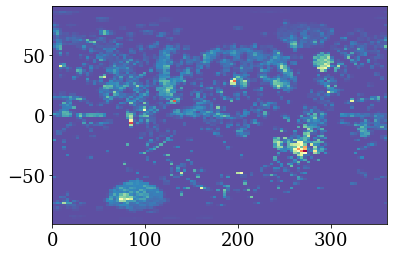

In [6]:
_ = plt.hist2d(tbl['RA'], tbl['DEC'],range=[[0,360],[-90,90]],bins=100, cmap=plt.cm.Spectral_r)

Text(0, 0.5, 'Number of Stars')

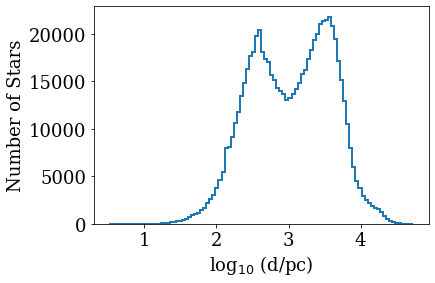

In [7]:
_ = plt.hist(np.log10(tbl['GAIAEDR3_R_LO_PHOTOGEO']),bins=100, lw=2, histtype='step')
plt.xlabel(r'log$_{10}$ (d/pc)')
plt.ylabel('Number of Stars')

In [8]:
# select stars within 100pc (aka GCNS)

n100 = tbl['GAIAEDR3_R_LO_PHOTOGEO'] <= 100
print(sum(n100))

18184


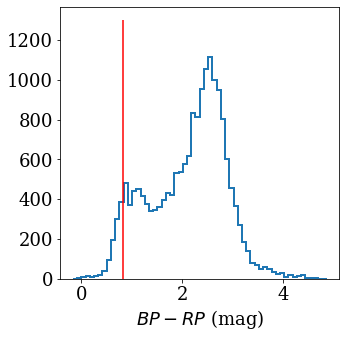

In [9]:
plt.figure(figsize=(5,5))

_ = plt.hist(tbl['GAIAEDR3_PHOT_BP_MEAN_MAG'][n100] - tbl['GAIAEDR3_PHOT_RP_MEAN_MAG'][n100], 
             bins=60, histtype='step', lw=2)
plt.xlabel('$BP - RP$ (mag)')
# approx color of the Sun, https://arxiv.org/abs/1806.01953
plt.vlines(0.82, 0, 1300, color='r')

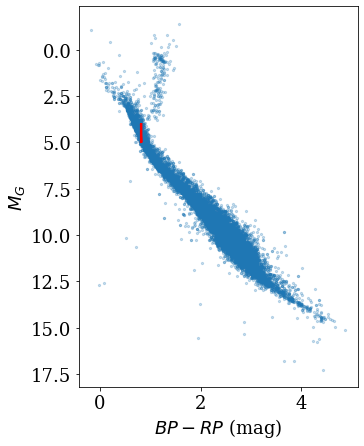

In [10]:
# make CMD

plt.figure(figsize=(5,7))
plt.scatter(tbl['GAIAEDR3_PHOT_BP_MEAN_MAG'][n100] - tbl['GAIAEDR3_PHOT_RP_MEAN_MAG'][n100], 
            tbl['GAIAEDR3_PHOT_G_MEAN_MAG'][n100] - 5.* np.log10(tbl['GAIAEDR3_R_MED_PHOTOGEO'][n100])+5, 
            s=5, alpha=0.25, label='d<100pc, N='+str(sum(n100)))
# plt.vlines(0.82, 16,-1.5, color='r', alpha=0.5)
plt.plot([0.82+0.01, 0.82+0.01, 0.82-0.01, 0.82-0.01], [4,5,4,5], c='r')
plt.gca().invert_yaxis()
# plt.legend(fontsize=12)
plt.xlabel('$BP - RP$ (mag)')
plt.ylabel('$M_G$')
plt.savefig('cmd1.png',dpi=150,bbox_inches='tight')

In [11]:
n100s = ((tbl['GAIAEDR3_R_HI_PHOTOGEO'] <= 300) & 
         (((tbl['GAIAEDR3_R_HI_PHOTOGEO'] - tbl['GAIAEDR3_R_MED_PHOTOGEO'])/tbl['GAIAEDR3_R_HI_PHOTOGEO']) < 0.01) &
         (tbl['GAIAEDR3_PHOT_BP_MEAN_MAG'] - tbl['GAIAEDR3_PHOT_RP_MEAN_MAG'] < (0.82+0.01)) & 
         (tbl['GAIAEDR3_PHOT_BP_MEAN_MAG'] - tbl['GAIAEDR3_PHOT_RP_MEAN_MAG'] > (0.82-0.01)) & 
         ((tbl['GAIAEDR3_PHOT_G_MEAN_MAG'] - 5.* np.log10(tbl['GAIAEDR3_R_MED_PHOTOGEO'])+5) < 5) &
         ((tbl['GAIAEDR3_PHOT_G_MEAN_MAG'] - 5.* np.log10(tbl['GAIAEDR3_R_MED_PHOTOGEO'])+5) > 4)
        )

print(sum(n100s))
print(sum(tbl['LOGG'][n100s] > 4.4))


1730
907


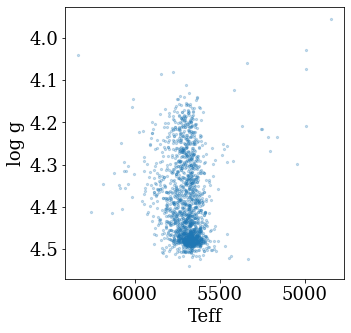

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(tbl['TEFF'][n100s], 
            tbl['LOGG'][n100s],
            s=5, alpha=0.25)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
# plt.xlim(8000,2000)
plt.xlabel('Teff')
plt.ylabel('log g')
plt.savefig('hrd2.png',dpi=150,bbox_inches='tight')

Text(0, 0.5, '$M_G$')

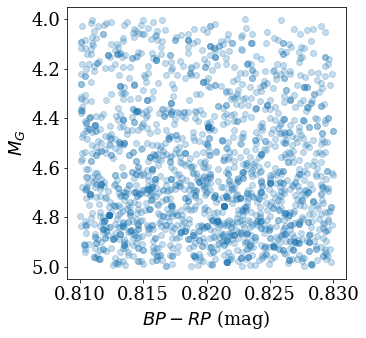

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(tbl['GAIAEDR3_PHOT_BP_MEAN_MAG'][n100s] - tbl['GAIAEDR3_PHOT_RP_MEAN_MAG'][n100s], 
            tbl['GAIAEDR3_PHOT_G_MEAN_MAG'][n100s] - 5.* np.log10(tbl['GAIAEDR3_R_MED_PHOTOGEO'][n100s])+5, 
            alpha=0.25, label='d<100pc, N='+str(sum(n100s)))
# plt.vlines(0.82, 16,-1.5, color='r', alpha=0.5)
plt.gca().invert_yaxis()
# plt.legend(fontsize=12)
plt.xlabel('$BP - RP$ (mag)')
plt.ylabel('$M_G$')
# plt.ylim(6.5,2.5)

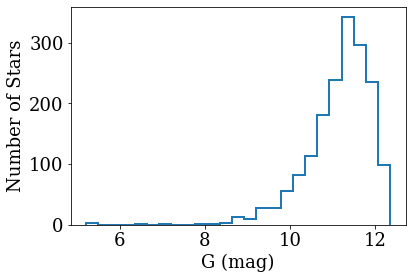

In [14]:
_ = plt.hist(tbl['GAIAEDR3_PHOT_G_MEAN_MAG'][n100s],bins=25, histtype='step', lw=2)
plt.xlabel('G (mag)')
plt.ylabel('Number of Stars')
plt.savefig('Gmag.png',dpi=150,bbox_inches='tight')

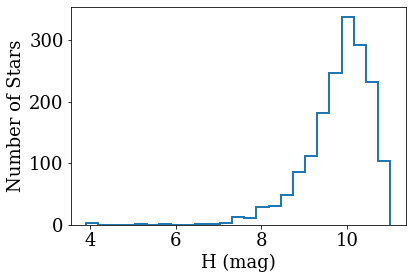

In [15]:
_ = plt.hist(tbl['H'][n100s],bins=25, histtype='step', lw=2)
plt.xlabel('H (mag)')
plt.ylabel('Number of Stars')
plt.savefig('Hmag.png',dpi=150,bbox_inches='tight')

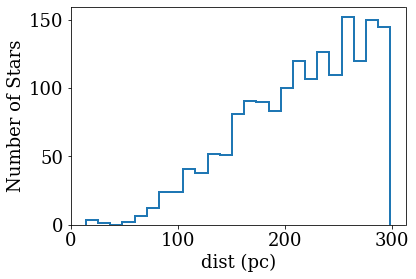

In [16]:
_ = plt.hist(tbl['GAIAEDR3_R_MED_PHOTOGEO'][n100s],bins=25, histtype='step', lw=2)
plt.xlabel('dist (pc)')
plt.ylabel('Number of Stars')
plt.savefig('dist.png',dpi=150,bbox_inches='tight')

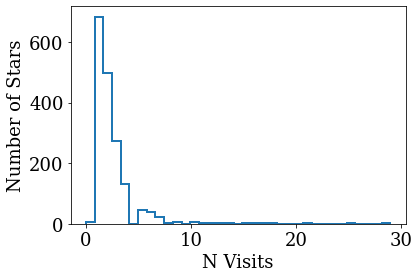

In [17]:
_ = plt.hist(tbl['NVISITS'][n100s],bins=35, histtype='step', lw=2)
plt.xlabel('N Visits')
plt.ylabel('Number of Stars')
plt.savefig('Nvisits.png',dpi=150,bbox_inches='tight')

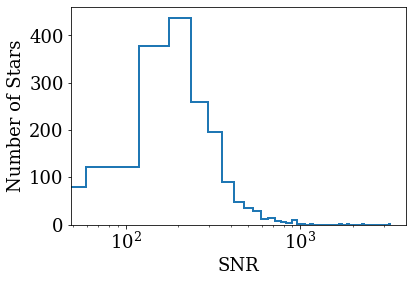

In [18]:
_ = plt.hist(tbl['SNR'][n100s],bins=55, histtype='step', lw=2)
plt.xlabel('SNR')
plt.ylabel('Number of Stars')
plt.xscale('log')
plt.savefig('SNR.png',dpi=150,bbox_inches='tight')

In [19]:
tbl

FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,H,H_ERR,K,K_ERR,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,TARG_PMRA,TARG_PMDEC,TARG_PM_SRC,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SURVEY,PROGRAMNAME,NVISITS,SNR,SNREV,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CHI2,RV_CCFWHM,RV_AUTOFWHM,RV_FLAG,N_COMPONENTS,MEANFIB,SIGFIB,MIN_H,MAX_H,MIN_JK,MAX_JK,GAIAEDR3_SOURCE_ID,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PHOT_G_MEAN_MAG,GAIAEDR3_PHOT_BP_MEAN_MAG,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_DR2_RADIAL_VELOCITY,GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,ASPCAP_GRID,"FPARAM_GRID [21,9]",CHI2_GRID [21],FPARAM [9],"FPARAM_COV [9,9]",ASPCAP_CHI2,PARAM [9],"PARAM_COV [9,9]",PARAMFLAG [9],ASPCAPFLAG,ASPCAPFLAGS,FRAC_BADPIX,FRAC_LOWSNR,FRAC_SIGSKY,FELEM [27],FELEM_ERR [27],X_H [27],X_H_ERR [27],X_M [27],X_M_ERR [27],ELEM_CHI2 [27],ELEMFRAC [27],ELEMFLAG [27],EXTRATARG,MEMBERFLAG,MEMBER,X_H_SPEC [27],X_M_SPEC [27],TEFF,TEFF_ERR,LOGG,LOGG_ERR,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,VMICRO,VMACRO,VSINI,TEFF_SPEC,LOGG_SPEC,C_FE,C_FE_SPEC,C_FE_ERR,C_FE_FLAG,CI_FE,CI_FE_SPEC,CI_FE_ERR,CI_FE_FLAG,N_FE,N_FE_SPEC,N_FE_ERR,N_FE_FLAG,O_FE,O_FE_SPEC,O_FE_ERR,O_FE_FLAG,NA_FE,NA_FE_SPEC,NA_FE_ERR,NA_FE_FLAG,MG_FE,MG_FE_SPEC,MG_FE_ERR,MG_FE_FLAG,AL_FE,AL_FE_SPEC,AL_FE_ERR,AL_FE_FLAG,SI_FE,SI_FE_SPEC,SI_FE_ERR,SI_FE_FLAG,P_FE,P_FE_SPEC,P_FE_ERR,P_FE_FLAG,S_FE,S_FE_SPEC,S_FE_ERR,S_FE_FLAG,K_FE,K_FE_SPEC,K_FE_ERR,K_FE_FLAG,CA_FE,CA_FE_SPEC,CA_FE_ERR,CA_FE_FLAG,TI_FE,TI_FE_SPEC,TI_FE_ERR,TI_FE_FLAG,TIII_FE,TIII_FE_SPEC,TIII_FE_ERR,TIII_FE_FLAG,V_FE,V_FE_SPEC,V_FE_ERR,V_FE_FLAG,CR_FE,CR_FE_SPEC,CR_FE_ERR,CR_FE_FLAG,MN_FE,MN_FE_SPEC,MN_FE_ERR,MN_FE_FLAG,FE_H,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,CO_FE,CO_FE_SPEC,CO_FE_ERR,CO_FE_FLAG,NI_FE,NI_FE_SPEC,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG,YB_FE,YB_FE_SPEC,YB_FE_ERR,YB_FE_FLAG,VISIT_PK [100]
bytes64,bytes30,bytes58,bytes71,bytes77,bytes6,int32,bytes20,bytes30,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bytes16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,bytes16,float32,bytes32,float32,float32,int32,int32,int32,int32,int32,int32,bytes132,bytes32,bytes32,int32,float32,float32,int64,bytes132,int64,bytes132,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,int64,int64,bytes256,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,int64,int32,int64,bytes10,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float3

In [19]:
# These are the files to pull
tbl['FILE'][n100s]

apStar-dr17-2M00030035+1554160.fits
apStar-dr17-2M00061847+1539108.fits
apStar-dr17-2M00091408+1445260.fits
apStar-dr17-2M00115214+8520020.fits
asStar-dr17-2M00124050-1948017.fits
apStar-dr17-2M00125570-1441121.fits
apStar-dr17-2M00164036+1612307.fits
apStar-dr17-2M00203029-0030022.fits
asStar-dr17-2M00241591-7717498.fits
...
apStar-dr17-2M23500813-2030272.fits


In [20]:
# So we can construct URLs for data: https://www.sdss.org/dr17/irspec/spectro_data/#ScienceArchiveServer(SAS)
TELESCOPE = tbl['TELESCOPE'][n100s]
FIELD = tbl['FIELD'][n100s]
FILE = tbl['FILE'][n100s]

u1 = 'https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/'

URL = np.array([], dtype=str)
for k in range(sum(n100s)):
    URL = np.append(URL, u1 + TELESCOPE[k] + '/' + FIELD[k] + '/' + FILE[k])

In [21]:
print('curl -O '+URL[0])

curl -O https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/107-46_MGA/apStar-dr17-2M00030035+1554160.fits


In [22]:
print('curl -O '+URL[1])

curl -O https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/107-46_MGA/apStar-dr17-2M00061847+1539108.fits


In [23]:
# hdul = fits.open('apStar-dr17-2M00030035+1554160.fits')
hdul = fits.open('apStar-dr17-2M00061847+1539108.fits')
hdul.info()

Filename: apStar-dr17-2M00061847+1539108.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     110   ()      
  1                1 ImageHDU        12   (8575, 4)   float64   
  2                1 ImageHDU        12   (8575, 4)   float64   
  3                1 ImageHDU        12   (8575, 4)   int64   
  4                1 ImageHDU        12   (8575, 4)   float64   
  5                1 ImageHDU        12   (8575, 4)   float64   
  6                1 ImageHDU        12   (8575, 4)   float64   
  7                1 ImageHDU        12   (8575, 4)   float64   
  8                1 ImageHDU         5   ()      
  9                1 BinTableHDU     58   2R x 23C   [72A, D, D, D, D, D, D, D, D, D, D, D, D, D, 765D, 765D, 765D, D, D, D, D, D, 765D]   
 10                1 BinTableHDU     58   1R x 23C   [72A, D, D, D, D, D, D, D, D, D, D, D, D, D, 243D, 243D, 243D, D, D, D, D, D, 243D]   


Text(0, 0.5, 'Flux (10^-17 erg/s/cm^2/Ang)')

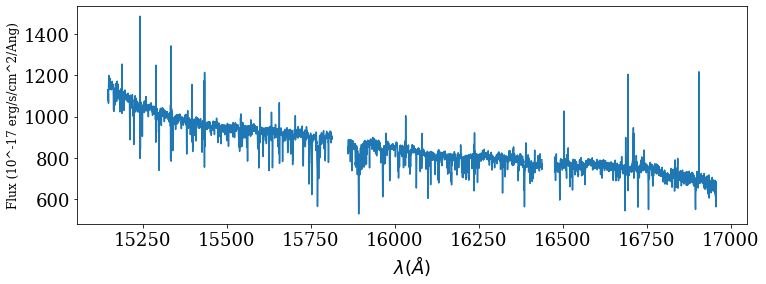

In [24]:
# spectra are in the 1st extension
sp = hdul[1].data

# reconstruct the wavelength axis from the header - NOTE: doesn't work for apVisit files!
wave = 10**(hdul[1].header['CRVAL1'] + (hdul[1].header['CDELT1'] * np.arange(sp.shape[1])))

plt.figure(figsize=(12,4))

# combined spectra are in the first column
plt.plot(wave, sp[0])

plt.xlabel('$\lambda (\AA)$')
plt.ylabel(hdul[1].header['BUNIT'],fontsize=12)


In [25]:
# what is the average wavelength resolution per pixel?
np.median(np.diff(wave))

0.22135479753069376

(15600.0, 15800.0)

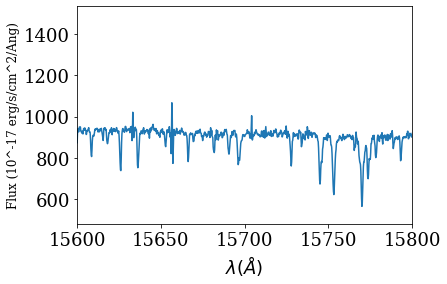

In [81]:
plt.plot(wave, sp[0])

plt.xlabel('$\lambda (\AA)$')
plt.ylabel(hdul[1].header['BUNIT'],fontsize=12)
plt.xlim(15600,15800)


In [82]:
hdul.info()

Filename: apStar-dr17-2M00061847+1539108.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     110   ()      
  1                1 ImageHDU        12   (8575, 4)   float64   
  2                1 ImageHDU        12   (8575, 4)   float64   
  3                1 ImageHDU        12   (8575, 4)   int64   
  4                1 ImageHDU        12   (8575, 4)   float64   
  5                1 ImageHDU        12   (8575, 4)   float64   
  6                1 ImageHDU        12   (8575, 4)   float64   
  7                1 ImageHDU        12   (8575, 4)   float64   
  8                1 ImageHDU         5   ()      
  9                1 BinTableHDU     58   2R x 23C   [72A, D, D, D, D, D, D, D, D, D, D, D, D, D, 765D, 765D, 765D, D, D, D, D, D, 765D]   
 10                1 BinTableHDU     58   1R x 23C   [72A, D, D, D, D, D, D, D, D, D, D, D, D, D, 243D, 243D, 243D, D, D, D, D, D, 243D]   


In [89]:
hdul[8].array

AttributeError: 'ImageHDU' object has no attribute 'array'

In [94]:
test = Table.read('apStar-dr17-2M00061847+1539108.fits', format='fits', hdu=8)

ValueError: No table found in hdu=8

In [91]:
test

filename,jd,snr,vhelio,vrel,vrelerr,teff,tefferr,logg,loggerr,feh,feherr,chisq,bc,x_ccf [765],ccf [765],ccferr [765],xcorr_vrel,xcorr_vrelerr,xcorr_vhelio,ccpfwhm,autofwhm,autoccf [765]
bytes72,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
apVisit-dr17-12700-59074-161.fits,2459074.94867,30.3764,-12.363451432623393,-32.95480008069468,0.09200049954596981,6101.361985395421,14.908143271774403,4.56842960908958,0.013619793349082384,-0.37686832246644747,0.007942241725287057,1.0317635076507639,20.59134864807129,-976.2516769754135 .. 1024.8640956188574,0.0006170213716521606 .. 0.009906282957443769,0.005099822191801311 .. 0.005791559106053517,-32.95480008069468,0.05640471832400215,-12.363451432623393,24.4622649297103,22.118337380732974,-0.008998959779077262 .. -0.004940284517454235
apVisit-dr17-12700-59077-161.fits,2459077.90881,67.8327,-11.92550660556822,-31.63398934787779,0.04138912283531179,6101.361985395421,14.908143271774403,4.56842960908958,0.013619793349082384,-0.37686832246644747,0.007942241725287057,1.2242358386858054,19.70848274230957,-978.4682734275615 .. 1022.7205445995467,0.002343895180800638 .. 0.006570846801301922,0.00310653309595978 .. 0.003494534858399887,-31.63398934787779,0.031347829119937144,-11.92550660556822,23.86965892793971,22.117556920703137,-0.014318400730223757 .. -0.005185867625301781
